In [ ]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data.csv')
df.sample(frac = 1)   #SHuffle dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
11918,32,admin.,single,university.degree,unknown,no,no,telephone,jun,fri,...,15,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228,no
29382,43,blue-collar,married,basic.6y,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099,no
10969,56,technician,single,university.degree,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228,no
10865,35,technician,married,professional.course,no,no,no,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228,yes
12343,33,technician,married,university.degree,no,unknown,unknown,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20000,42,self-employed,married,university.degree,no,yes,no,cellular,aug,fri,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228,no
8142,48,blue-collar,married,basic.4y,unknown,no,no,telephone,jun,tue,...,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228,no
11706,38,technician,divorced,professional.course,no,yes,no,telephone,jun,fri,...,8,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228,no
22731,30,technician,single,professional.course,no,no,no,cellular,aug,mon,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228,no


In [ ]:
#Checking descriptive stats
df.describe()
#Data is non-normally disributed, Mean !=Median

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41138.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.265156,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.294012,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,179.500000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41101 non-null  object 
 9   day_of_week     41146 non-null  object 
 10  duration        41138 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

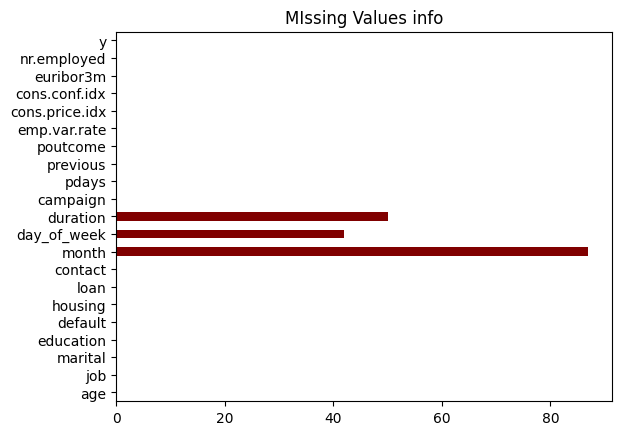

In [ ]:
#Method 01: Visualizing missing value
df.isnull().sum().plot(kind = 'barh', color = 'maroon')
plt.title("MIssing Values info")
plt.show()

<Axes: >

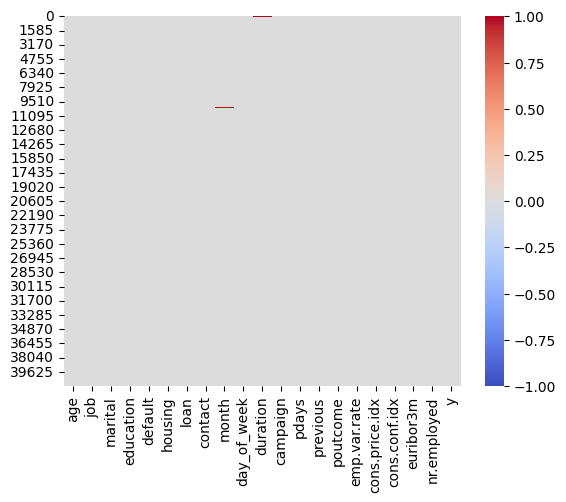

In [ ]:
#Method 02: To plot missing value info

sns.heatmap(df.isnull(), cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0)

In [ ]:
#Imputation method using pandas function
''' Inpute with Mean
Impute with Median
Impute with any constant value
Impute with Mode'''
# df['duration'].isnull().sum()   #put 50 values
print(df['duration'].mean())
print(df['duration'].median())

#mode for categorical
#use median value when diff is big between mean n median, else mean

258.2651563031747
179.5


<Axes: >

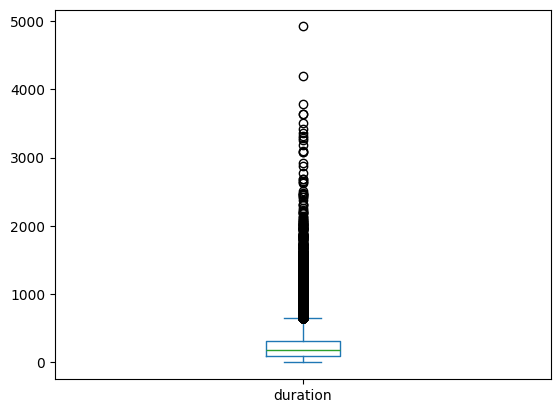

In [ ]:
df['duration'].plot(kind = 'box')

In [ ]:
df['duration'].quantile(0.75), df['duration'].quantile(0.25)
#upper value 319, lower 103=2, use any value which comes betwwen upper nd lower

(np.float64(319.0), np.float64(102.0))

In [ ]:
df['duration'].fillna(217, inplace = True) #true likhna padta hai so that har jagah 217 dale, python bulakkad

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41101 non-null  object 
 9   day_of_week     41146 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df['month'].value_counts() #mode- may as it is most frequently coming value may(13769)
#Mode =categorical+object


,count
month,
may,13856
jul,7174
aug,6178
jun,5231
nov,4101
apr,2632
oct,718
sep,570
mar,546


In [ ]:
df['day_of_week'].value_counts() #most frequent ocuring MODE is 'thu'

,count
day_of_week,
thu,8623
mon,8472
wed,8134
tue,8090
fri,7827


In [ ]:
df['month'].mode()

,month
0,may


In [ ]:
df['day_of_week'].mode()

,day_of_week
0,thu


In [ ]:
df['month'].fillna('may', inplace = True)
#inputing with mode

<ipython-input-72-e96a7f7ea8ca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['month'].fillna('may', inplace = True)


In [ ]:
df['day_of_week'].fillna('thu', inplace = True) #inputing with mode

<ipython-input-73-d0fb54ad89da>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['day_of_week'].fillna('thu', inplace = True) #inputing with mode


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


In [ ]:
df['marital'].value_counts()

,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['marital'] = le.fit_transform(df['marital'])
df['marital'].value_counts()
#any encoding tech can't be used for the TARGET column, in classfication model

,count
marital,
1,24928
2,11568
0,4612
3,80
